In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Fifa_23_Players_Data.csv')
data.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [3]:
data.shape

(17529, 89)

In [4]:
data.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [5]:
data.isna().any().sum()

0

No Null Values

# 

In [6]:
data.columns = [i.replace(' ', '_') for i in data.columns]

In [7]:
data.head()

,Known_As,Full_Name,Overall,Potential,Value(in_Euro),Positions_Played,Best_Position,Nationality,Image_Link,Age,...,LM_Rating,CM_Rating,RM_Rating,LWB_Rating,CDM_Rating,RWB_Rating,LB_Rating,CB_Rating,RB_Rating,GK_Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


# 

#### dropping irrelevant features...

In [8]:
data = data.drop(columns = ['Full_Name', 'Image_Link', 'National_Team_Image_Link', 'National_Team_Jersey_Number', 
                            'TotalStats', 'BaseStats', 'Release_Clause', 'Club_Position', 'Club_Jersey_Number'
                           , 'Weak_Foot_Rating', 'Skill_Moves', 'International_Reputation', 
                           'National_Team_Position', 'Attacking_Work_Rate', 'Defensive_Work_Rate', 'On_Loan'])

In [9]:
data = data.drop(columns = data.select_dtypes('int64').loc[:,"Pace_Total":"GK_Rating"])

Many of the `Features'` measurements are Useless or not `self-describing` such as `TotalStats`, `BastStats`, `Skill_Moves`, `International_Reputation`, etc...     that is why we drop them.

We kept `Height` and `Weight` features as they can desribe (Practically) the Potential of athelting of a Player

In [10]:
data.head()

,Known_As,Overall,Potential,Value(in_Euro),Positions_Played,Best_Position,Nationality,Age,Height(in_cm),Weight(in_kg),Club_Name,Wage(in_Euro),Contract_Until,Joined_On,Preferred_Foot,National_Team_Name
0,L. Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,Paris Saint-Germain,195000,2023,2021,Left,Argentina
1,K. Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,Real Madrid CF,450000,2023,2009,Right,France
2,R. Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,FC Barcelona,420000,2025,2022,Right,Poland
3,K. De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,Manchester City,350000,2025,2015,Right,Belgium
4,K. Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,Paris Saint-Germain,230000,2024,2018,Right,France


In [11]:
data.shape

(17529, 16)

Now we have 16 `Features`...

In [12]:
data.columns

Index(['Known_As', 'Overall', 'Potential', 'Value(in_Euro)',
       'Positions_Played', 'Best_Position', 'Nationality', 'Age',
       'Height(in_cm)', 'Weight(in_kg)', 'Club_Name', 'Wage(in_Euro)',
       'Contract_Until', 'Joined_On', 'Preferred_Foot', 'National_Team_Name'],
      dtype='object')

# 

## EDA

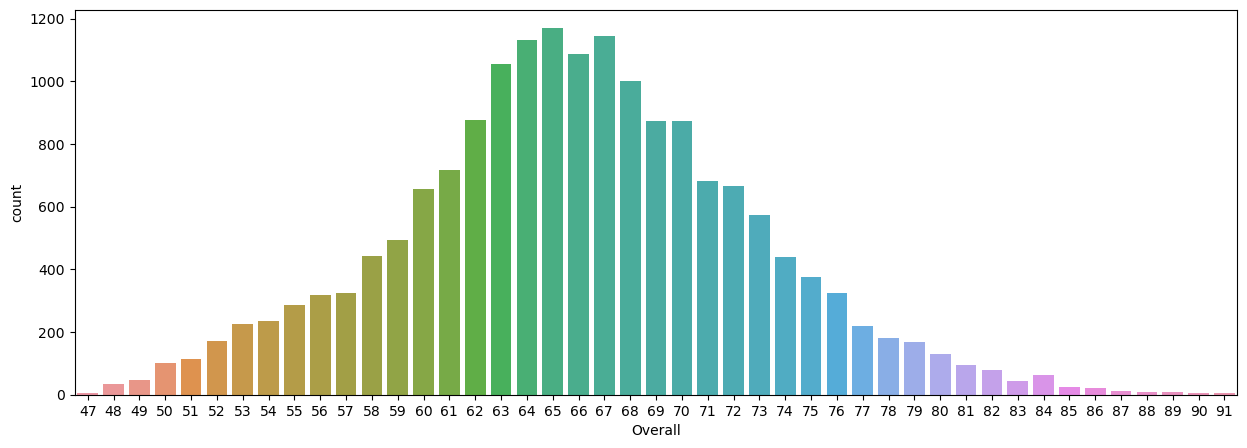

In [13]:
plt.figure(figsize = (15, 5))
sns.countplot(data.Overall);

Overall: The player's overall rating out of 100, based on their performance in different aspects of the game.

Players with Overall Rating are Maximum in the range of 62-70 out of 100 being 47 as min and 91 as max...

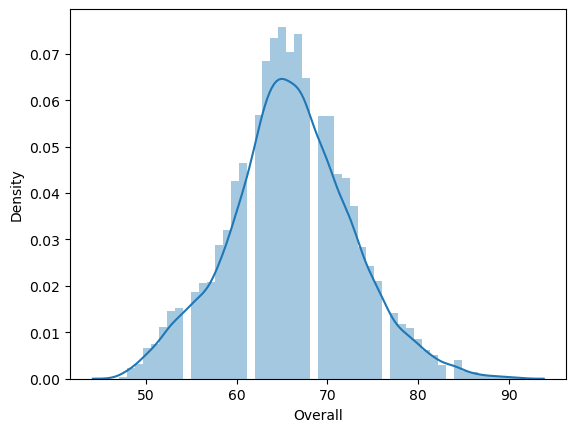

In [14]:
sns.distplot(data.Overall);

In [15]:
data[data.Overall == 91]

,Known_As,Overall,Potential,Value(in_Euro),Positions_Played,Best_Position,Nationality,Age,Height(in_cm),Weight(in_kg),Club_Name,Wage(in_Euro),Contract_Until,Joined_On,Preferred_Foot,National_Team_Name
0,L. Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,Paris Saint-Germain,195000,2023,2021,Left,Argentina
1,K. Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,Real Madrid CF,450000,2023,2009,Right,France
2,R. Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,FC Barcelona,420000,2025,2022,Right,Poland
3,K. De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,Manchester City,350000,2025,2015,Right,Belgium
4,K. Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,Paris Saint-Germain,230000,2024,2018,Right,France


Only `5` Players have maximum Overall Ranking as `91`...

###### 

# 

In [16]:
data[data['Value(in_Euro)'] == max(data['Value(in_Euro)'])]

,Known_As,Overall,Potential,Value(in_Euro),Positions_Played,Best_Position,Nationality,Age,Height(in_cm),Weight(in_kg),Club_Name,Wage(in_Euro),Contract_Until,Joined_On,Preferred_Foot,National_Team_Name
4,K. Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,Paris Saint-Germain,230000,2024,2018,Right,France


K.Mbappe` has the most Value amongst all the Players...

# 

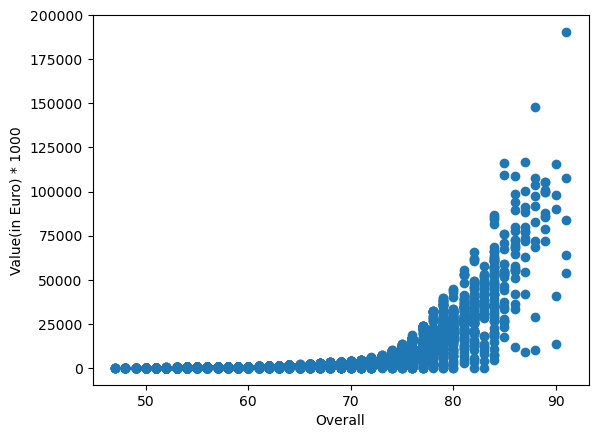

In [17]:
plt.scatter(y = data['Value(in_Euro)']/1000, x = data['Overall'])
plt.xlabel('Overall')
plt.ylabel('Value(in Euro) * 1000');

Here's an exponential growth in Value(in Euro) of a Player as Overall i.e. Overall Rating of a player increases...

###### 

In [18]:
x = data.Nationality.values
y = data.Nationality.value_counts()
y

England                1494
Germany                1188
Spain                  1026
France                  922
Argentina               871
                       ... 
São Tomé e Príncipe       1
Bermuda                   1
Korea DPR                 1
Liechtenstein             1
Singapore                 1
Name: Nationality, Length: 159, dtype: int64

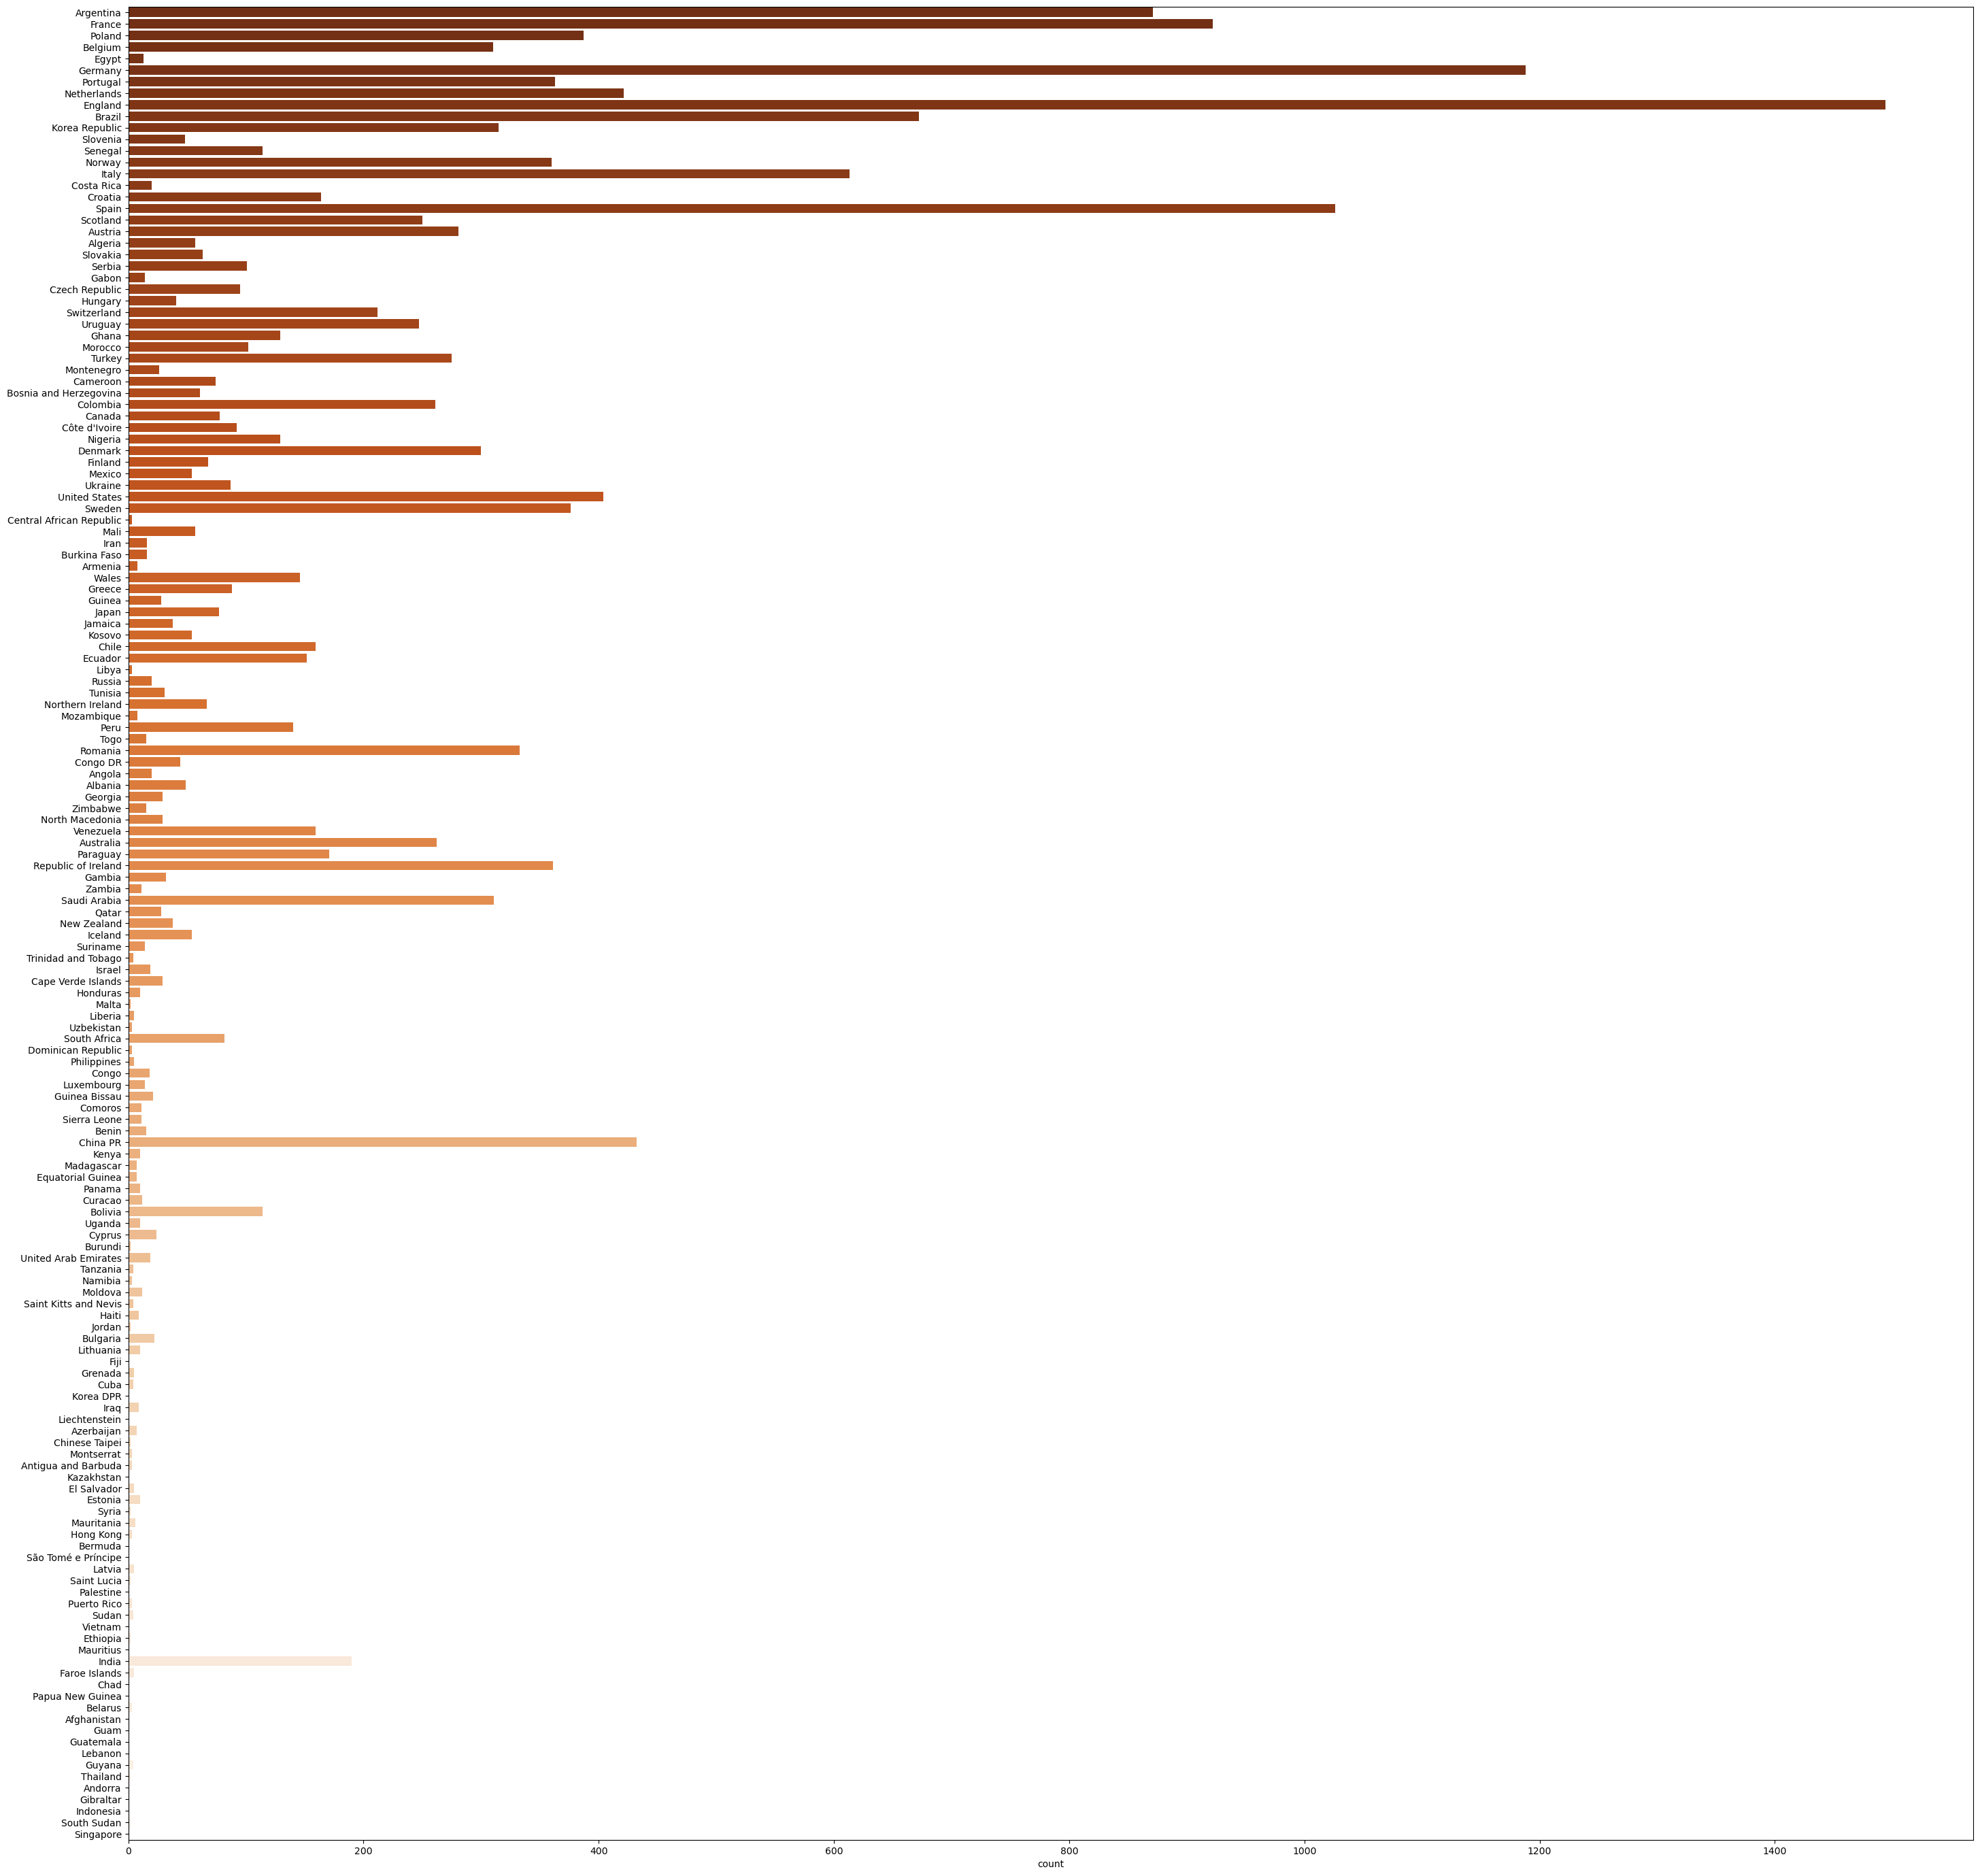

In [19]:
plt.figure(figsize = (35, 35))
sns.countplot(y = x, palette = 'Oranges_r');

And says that `England` has most Players in Fifa 2k23 following by `Germany` and then `Spain`...

`India` has almost 200 players...

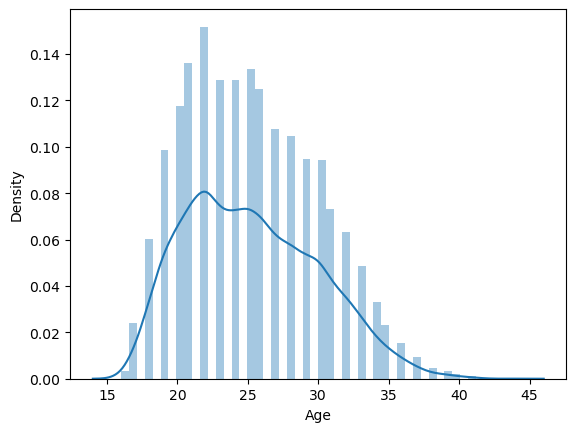

In [20]:
sns.distplot(data.Age);

It doesn't matter if `Age` is Normally Distributed or not...

###### 

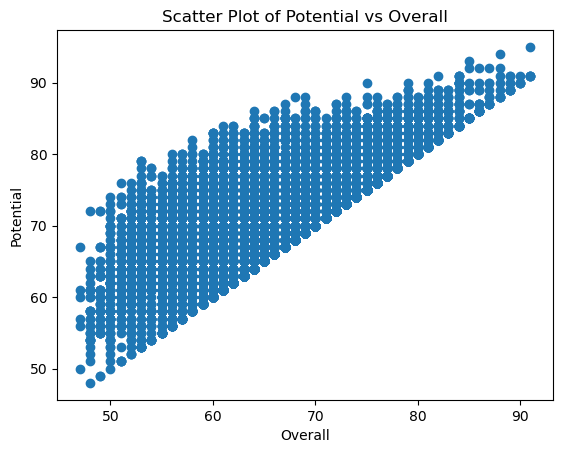

In [21]:
plt.scatter(x = data['Overall'], y = data['Potential'])
plt.xlabel('Overall')
plt.ylabel('Potential')
plt.title('Scatter Plot of Potential vs Overall');

As `Overall` increases `Potential` also increases... 

###### 

###### 

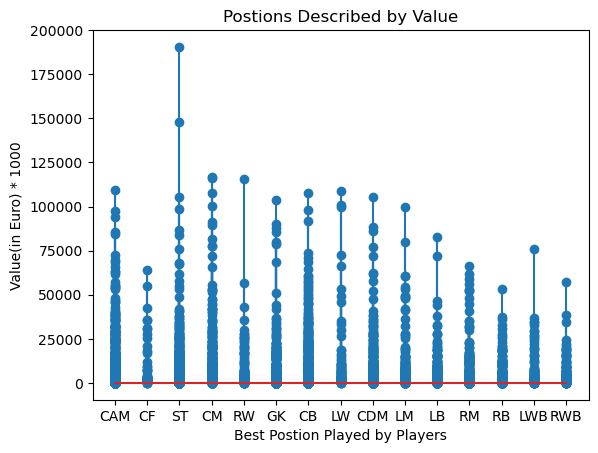

In [22]:
x = data['Best_Position']
y = data['Value(in_Euro)']/1000
plt.stem(x, y, use_line_collection = True)
plt.xlabel('Best Postion Played by Players')
plt.ylabel('Value(in Euro) * 1000')
plt.title('Postions Described by Value');

Suprisingly, `ST` viz. `Stopper` is actually the most Valued Position...

###### 

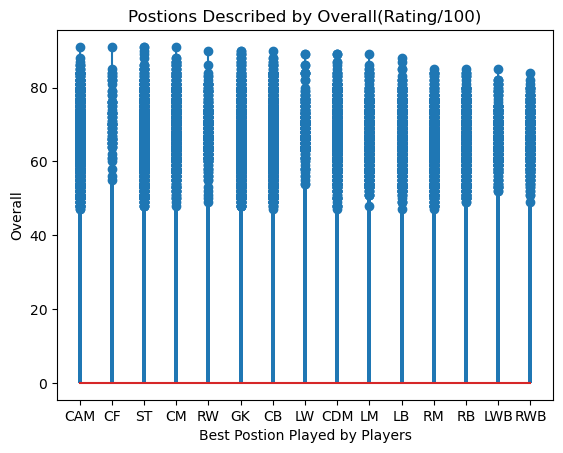

In [23]:
x = data['Best_Position']
y = data['Overall']
plt.stem(x, y, use_line_collection = True)
plt.xlabel('Best Postion Played by Players')
plt.ylabel('Overall')
plt.title('Postions Described by Overall(Rating/100)');

In [24]:
data['Overall'].max()

91

Again, All Positions are Rated in the range of 40-91 and only `C.F` viz. `Center Forward` Position is least Rated around more than 50...

###### 

`Wage(in_Euro)`, `Overall` and `Potential` have the major Corelation with `Value(in_Euro)`...

###### 

## Model Building...

In [25]:
data.head()

,Known_As,Overall,Potential,Value(in_Euro),Positions_Played,Best_Position,Nationality,Age,Height(in_cm),Weight(in_kg),Club_Name,Wage(in_Euro),Contract_Until,Joined_On,Preferred_Foot,National_Team_Name
0,L. Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,Paris Saint-Germain,195000,2023,2021,Left,Argentina
1,K. Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,Real Madrid CF,450000,2023,2009,Right,France
2,R. Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,FC Barcelona,420000,2025,2022,Right,Poland
3,K. De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,Manchester City,350000,2025,2015,Right,Belgium
4,K. Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,Paris Saint-Germain,230000,2024,2018,Right,France


In [26]:
Preferred_Foot = pd.get_dummies(data['Preferred_Foot'])
Preferred_Foot.head()

,Left,Right
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [27]:
new_data = pd.concat([data, Preferred_Foot], axis = 1)
new_data = new_data.drop('Preferred_Foot', axis = 1)
new_data.head()

,Known_As,Overall,Potential,Value(in_Euro),Positions_Played,Best_Position,Nationality,Age,Height(in_cm),Weight(in_kg),Club_Name,Wage(in_Euro),Contract_Until,Joined_On,National_Team_Name,Left,Right
0,L. Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,Paris Saint-Germain,195000,2023,2021,Argentina,1,0
1,K. Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,Real Madrid CF,450000,2023,2009,France,0,1
2,R. Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,FC Barcelona,420000,2025,2022,Poland,0,1
3,K. De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,Manchester City,350000,2025,2015,Belgium,0,1
4,K. Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,Paris Saint-Germain,230000,2024,2018,France,0,1


###### 

In [28]:
scaler = MinMaxScaler()
numeric_vars = ['Overall', 'Potential', 'Value(in_Euro)', 'Height(in_cm)', 'Weight(in_kg)', 'Wage(in_Euro)', 'Age']
new_data[numeric_vars] = scaler.fit_transform(new_data[numeric_vars])

###### 

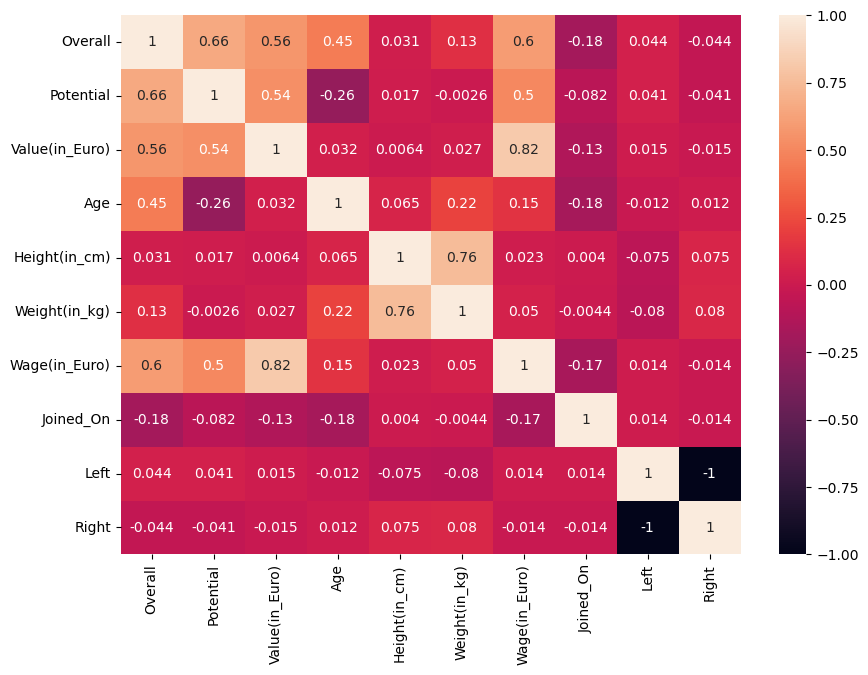

In [29]:
plt.figure(figsize = (10, 7))
corr = new_data.corr()
sns.heatmap(corr, annot = True);

###### 

In [30]:
x = new_data.drop(['Known_As', 'Positions_Played', 'Contract_Until', 'Best_Position', 'Nationality', 'Club_Name','National_Team_Name'], axis = 1)
y = new_data['Value(in_Euro)']

In [31]:
df_train, df_test = train_test_split(x, test_size = 0.2, random_state = 101)

In [32]:
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('Value(in_Euro)')
x_train = df_train

y_test = df_test.pop('Value(in_Euro)')
x_test = df_test

# Using RFE...

In [33]:
len(x_train.columns)

9

In [34]:
rge = DecisionTreeRegressor(max_depth = 8)
rge.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [35]:
rfe = RFE(rge, n_features_to_select = 6)
rfe = rfe.fit(x_train, y_train)

In [36]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Overall', True, 1),
 ('Potential', True, 1),
 ('Age', True, 1),
 ('Height(in_cm)', True, 1),
 ('Weight(in_kg)', False, 2),
 ('Wage(in_Euro)', True, 1),
 ('Joined_On', True, 1),
 ('Left', False, 4),
 ('Right', False, 3)]

Here, the List shows the features those were used to predict & the features those were eliminated

In [37]:
y_pred = rfe.predict(x_test)

In [38]:
y_train_pred = rfe.predict(x_train)

In [39]:
r21 = r2_score(y_test, y_pred)
r21

0.9662595962252611

In [40]:
r22 = r2_score(y_train, y_train_pred)
r22

0.9886468729451362

There is no significant difference between the training as well as testing accuracy which shows that there is no sign of Overfitting or Underfitting...

###### 

In [41]:
rge = DecisionTreeRegressor(max_depth = 6)
rge.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [42]:
rfe = RFE(rge, n_features_to_select = 6)
rfe = rfe.fit(x_train, y_train)

In [43]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Overall', True, 1),
 ('Potential', True, 1),
 ('Age', True, 1),
 ('Height(in_cm)', True, 1),
 ('Weight(in_kg)', False, 4),
 ('Wage(in_Euro)', True, 1),
 ('Joined_On', True, 1),
 ('Left', False, 3),
 ('Right', False, 2)]

Again, the List shows the features those were used to predict & the features those were eliminated

In [44]:
y_pred = rfe.predict(x_test)

In [45]:
y_train_pred = rfe.predict(x_train)

In [46]:
r21 = r2_score(y_test, y_pred)
r21

0.9665456486322586

In [47]:
r22 = r2_score(y_train, y_train_pred)
r22

0.9704260922037875

There is no significant difference between the training as well as testing accuracy which shows that there is no sign of Overfitting or Underfitting...

###### 

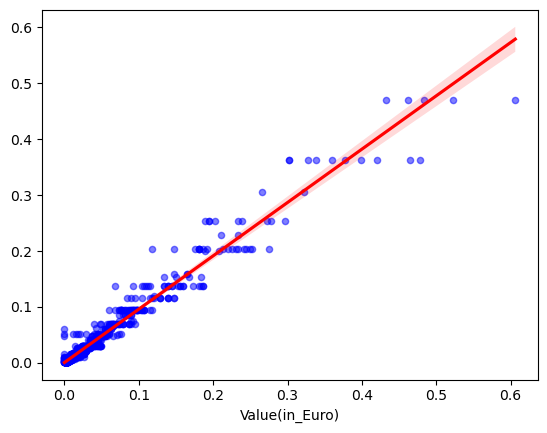

In [48]:
sns.regplot(x = y_test, y = y_pred, color = 'blue', scatter_kws = {'s': 20, 'alpha': 0.5}, line_kws = {'color': 'red'});

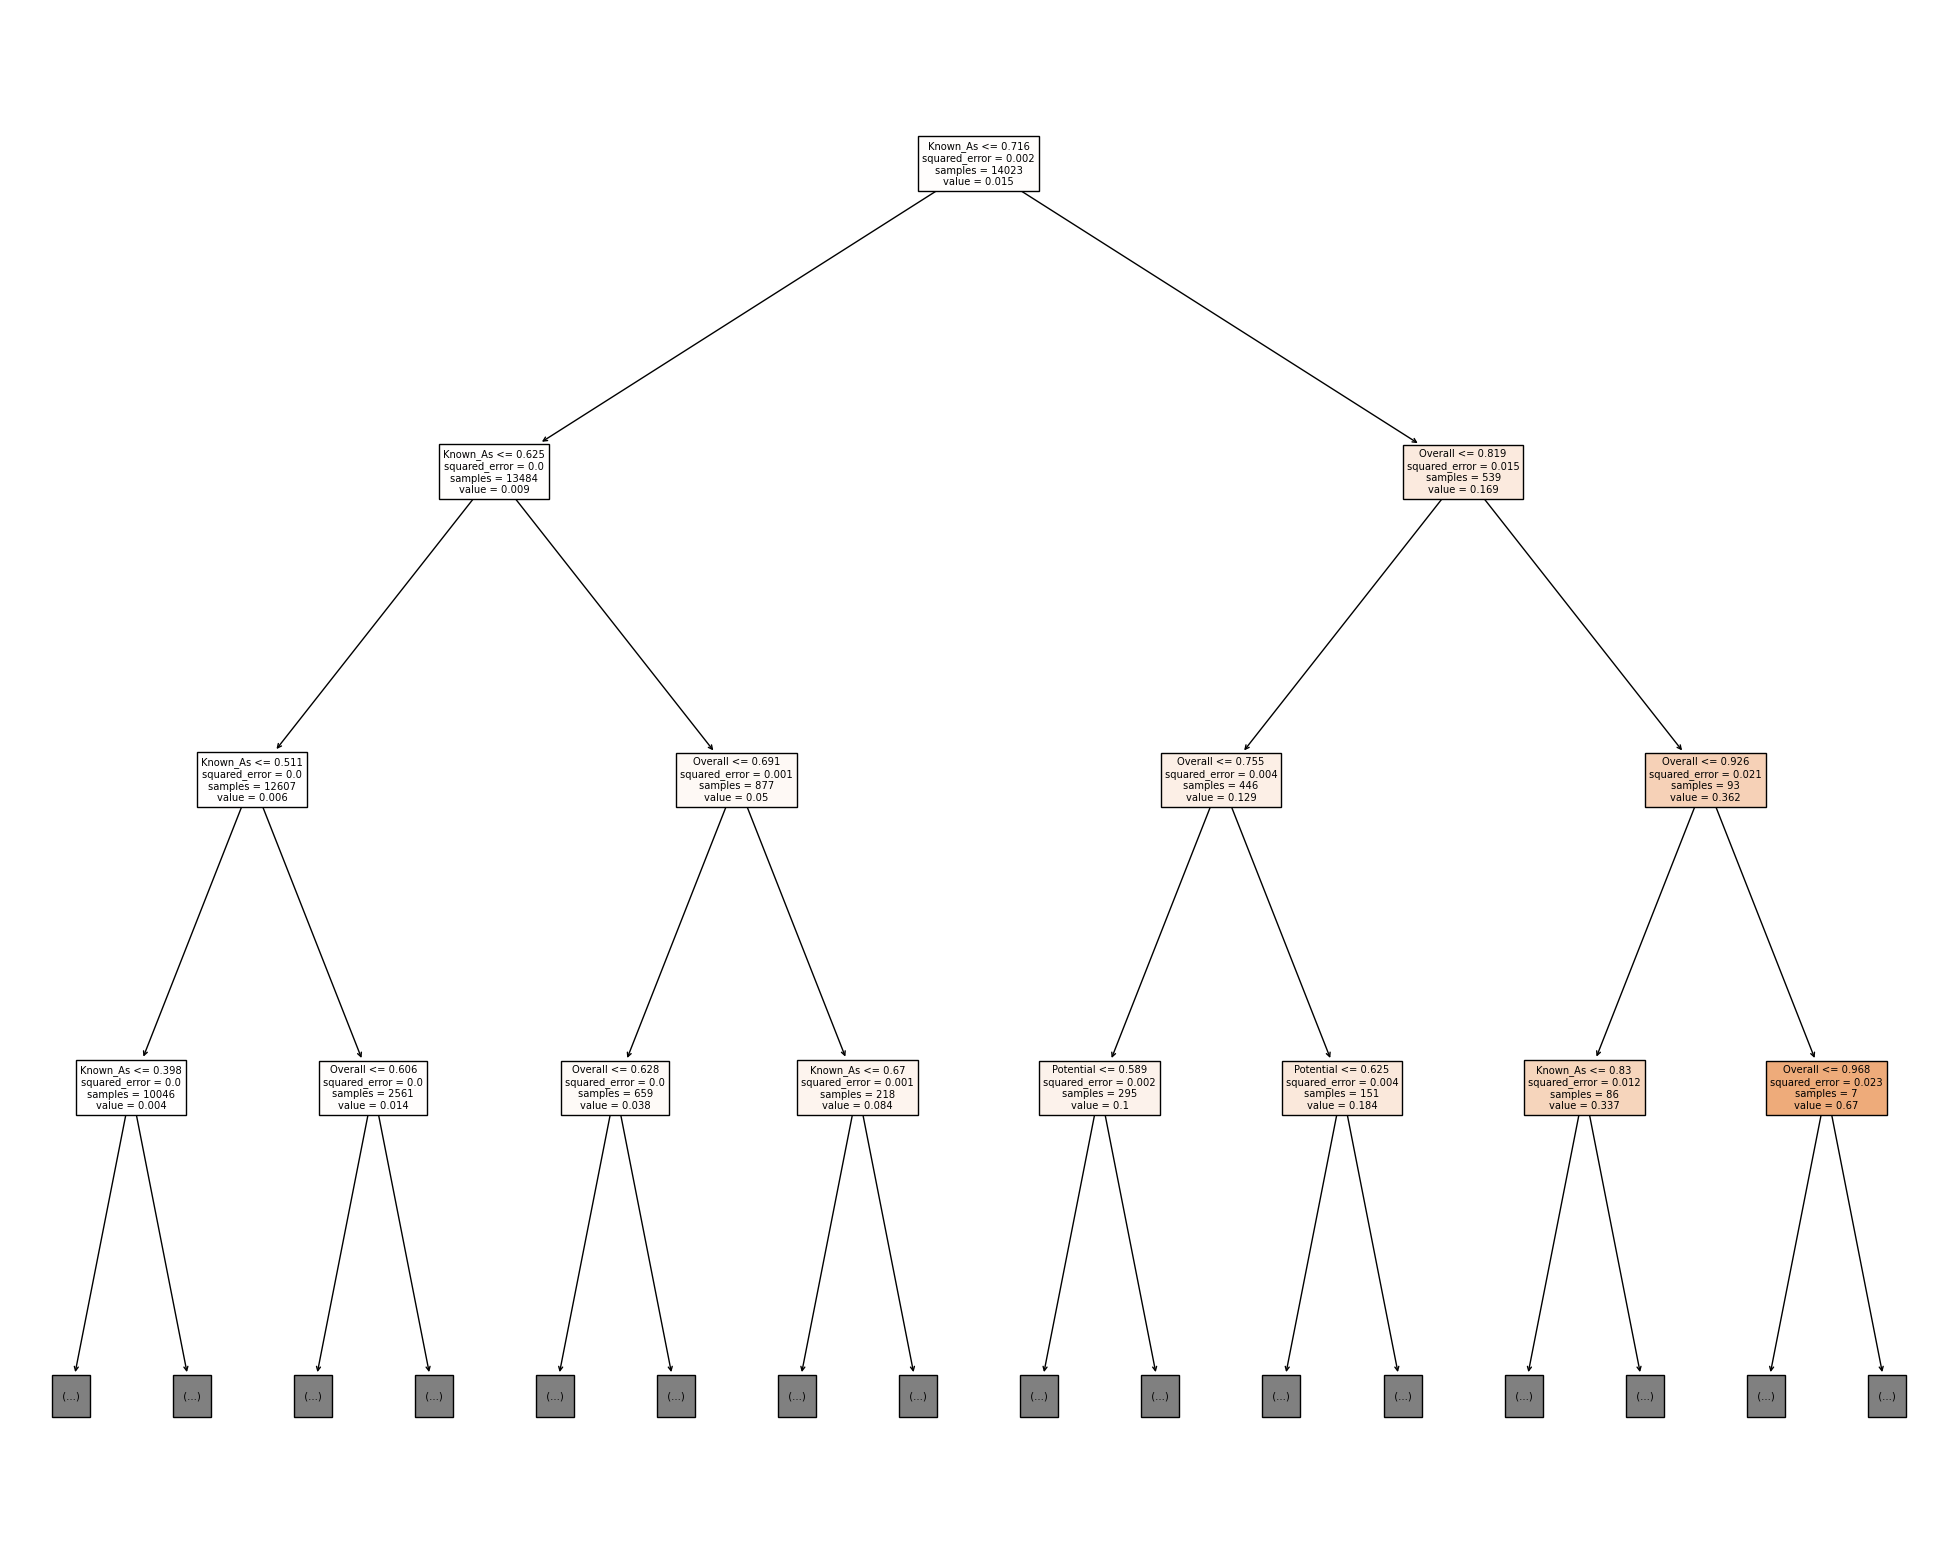

In [49]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(rge, max_depth = 3,
                   feature_names=new_data.columns,  
                   class_names=new_data['Value(in_Euro)'],
                   filled=True)
